# Analyzing Public Transportation Usage to enhance Efforts of Reducing Social Isolation

### Install Dependencies

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Read in Data

In [137]:
#2018 AARP Survey
df_2018 = pd.read_csv('Data/aarp.csv')

#2017 AARP Survey

#Hopefully Prior year Surveys

# EDA

In [138]:
df_2018.head()

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
0,0,54.0,0.756810,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,No,No,No,...,Other,Selected,Own,NaN,Other,Other,Other,Other,Yes,1.0
1,1,56.0,2.931238,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Own,NaN,Other,Yes,Other,Other,Other,1.0
2,2,67.0,6.867710,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,Yes,No,Yes,...,Other,Selected,Other,NaN,Other,Other,Other,Yes,Yes,2.0
3,3,68.0,0.827716,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,CA,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0
4,4,72.0,0.712991,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move to a different community,No,Yes,No,...,Other,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0


In [139]:
df_2018.describe()

,Unnamed: 0,CaseId,WEIGHT,duration,LGBTFLAG,AGE,HHSIZE,HH01,HH25,HH612,HH1317,HH18OV,Disablecombo,housecomp,countInHouse
count,1947.000000,1947.000000,1947.000000,1947.000000,363.0,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.000000,1947.00000,0.0,0.0,1947.000000
mean,973.000000,4122.983051,1.000000,358.551104,1.0,44.743708,2.833590,0.032357,0.134052,0.216744,0.174114,2.24756,NaN,NaN,1.222393
std,562.194806,2367.516620,1.213575,1169.262974,0.0,17.473649,1.463162,0.196267,0.424102,0.544303,0.473325,1.15069,NaN,NaN,1.088269
min,0.000000,54.000000,0.001845,2.000000,1.0,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,0.000000
25%,486.500000,2086.500000,0.210824,13.000000,1.0,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.00000,NaN,NaN,0.000000
50%,973.000000,4161.000000,0.592207,20.000000,1.0,42.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.00000,NaN,NaN,1.000000
75%,1459.500000,6212.000000,1.272429,34.000000,1.0,59.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.00000,NaN,NaN,2.000000
max,1946.000000,8216.000000,10.519664,12563.000000,1.0,90.000000,6.000000,3.000000,3.000000,4.000000,3.000000,10.00000,NaN,NaN,5.000000


In [140]:
df_2018.dtypes

Unnamed: 0        int64
CaseId          float64
WEIGHT          float64
LGBT             object
Q1               object
                 ...   
dumover18        object
dumcollege       object
dumparents       object
dumother         object
countInHouse    float64
Length: 259, dtype: object

In [141]:
df_2018.corr()

,Unnamed: 0,CaseId,WEIGHT,duration,LGBTFLAG,AGE,HHSIZE,HH01,HH25,HH612,HH1317,HH18OV,Disablecombo,housecomp,countInHouse
Unnamed: 0,1.000000,0.999853,-0.018289,0.008076,NaN,0.007297,-0.026321,-0.012602,-0.040629,-0.023265,0.001835,-0.013427,NaN,NaN,-0.035253
CaseId,0.999853,1.000000,-0.018127,0.008400,NaN,0.006919,-0.026038,-0.012789,-0.040462,-0.023408,0.001644,-0.012818,NaN,NaN,-0.035075
WEIGHT,-0.018289,-0.018127,1.000000,-0.041480,NaN,0.119629,0.024403,-0.012955,0.053040,0.063985,-0.009896,-0.011798,NaN,NaN,-0.014410
duration,0.008076,0.008400,-0.041480,1.000000,NaN,-0.094509,0.058512,0.011987,0.020296,0.041990,0.003359,0.050868,NaN,NaN,0.019028
LGBTFLAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,0.007297,0.006919,0.119629,-0.094509,NaN,1.000000,-0.385264,-0.095126,-0.202975,-0.148195,-0.114392,-0.285129,NaN,NaN,-0.288258
HHSIZE,-0.026321,-0.026038,0.024403,0.058512,NaN,-0.385264,1.000000,0.172652,0.365560,0.487949,0.423248,0.732580,NaN,NaN,0.540900
HH01,-0.012602,-0.012789,-0.012955,0.011987,NaN,-0.095126,0.172652,1.000000,0.071334,0.069004,0.016765,0.005469,NaN,NaN,0.086586
HH25,-0.040629,-0.040462,0.053040,0.020296,NaN,-0.202975,0.365560,0.071334,1.000000,0.207985,0.003984,0.050951,NaN,NaN,0.135785
HH612,-0.023265,-0.023408,0.063985,0.041990,NaN,-0.148195,0.487949,0.069004,0.207985,1.000000,0.140667,0.068533,NaN,NaN,0.244771


### Look at attributes about people who use public transit

In [142]:
df_2018[df_2018['Q24G']=='Yes']

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,CASTATE,filter_$,Ownership,housecomp,dumunder18,dumover18,dumcollege,dumparents,dumother,countInHouse
5,5,77.0,0.358276,Other,Somewhat agree,Somewhat disagree,Move to a different community,No,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
14,14,97.0,0.105040,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Stay in your current residence and never move,Yes,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
15,15,100.0,0.453580,Straight (that is not gay/lesbian),Strongly agree,Strongly disagree,Move into a different residence within your cu...,No,Yes,No,...,Other,Selected,Other,NaN,Other,Yes,Yes,Yes,Other,3.0
20,20,122.0,0.343383,Straight (that is not gay/lesbian),Strongly agree,Somewhat disagree,Move into a different residence within your cu...,Yes,No,Yes,...,CA,Selected,Rent,NaN,Other,Other,Other,Yes,Other,1.0
24,24,134.0,0.569368,Straight (that is not gay/lesbian),Somewhat agree,Somewhat disagree,Move to a different community,No,No,Yes,...,Other,Selected,Own,NaN,Yes,Other,Other,Other,Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,1921,8108.0,0.467560,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Not sure,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1928,1928,8135.0,0.717754,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move into a different residence within your cu...,No,No,No,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Yes,1.0
1933,1933,8156.0,0.633565,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Selected,Rent,NaN,Other,Other,Other,Other,Other,0.0
1939,1939,8192.0,0.249703,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Not sure,Yes,Yes,Yes,...,Other,Selected,Other,NaN,Other,Other,Other,Yes,Yes,2.0


In [143]:
df_2018[['Q24G','Q24A','Q24B','Q24C','Q24D','Q24E','Q24F','Q24J']]['Q24G'].unique()

array(['No', 'SKIPPED ON WEB', 'Yes', 'DON’T KNOW'], dtype=object)

In [144]:
df_2018['AGE4']

0         60+
1         60+
2       30-44
3       30-44
4       45-59
        ...  
1942    18-29
1943    45-59
1944      60+
1945      60+
1946    45-59
Name: AGE4, Length: 1947, dtype: object

In [145]:
df_2018['D26'].unique()

array(['Rural area',
       'Suburban with a mix of offices, apartments and shops',
       'Urban near mix of offices, apartments and shops',
       'Suburban and mostly residential', 'Urban and mostly residential',
       'Small town', 'SKIPPED ON WEB', 'DON’T KNOW'], dtype=object)

### -------------------------------------------------------------------------------------------------------------------------------------------------------

# Feature Engineering

### Create Binary Dependent Variable for someone using public transit

In [146]:
df_2018['uses_pt'] = df_2018['Q24G'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

In [147]:
#Look at the distribution
df_2018['uses_pt'].value_counts()

0    1545
1     402
Name: uses_pt, dtype: int64

### Create New Feature that identifies how many modes of Transportation someone uses

In [148]:
#Create New Variable
df_2018['number_of_modes'] = 0

#Loop through the questions that establish which modes used
for question in df_2018[['Q24G','Q24A','Q24B','Q24C','Q24D','Q24E','Q24F','Q24J']]:
    
    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, then add one count to the new variable
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,260]+=1
        
        #update the index    
        index +=1
        

## Create features that identifies if some one travels completely independently, completely dependently, or both

In [149]:
#Create completely Independent Travel Variable
df_2018['independent_travel'] = 0

#Loop through completely independent modes
for question in df_2018[['Q24A','Q24B','Q24H']]:

    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, set equal to 1
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,261] = 1
        
        #update the index    
        index +=1

In [150]:
#check values
df_2018['independent_travel'].value_counts()

1    1726
0     221
Name: independent_travel, dtype: int64

In [151]:
#Create completely Dependent Travel Variable
df_2018['dependent_travel'] = 0

#Loop through completely dependent modes
for question in df_2018[['Q24G','Q24C','Q24D','Q24E','Q24F']]:
    
    #Track the index of the respondent
    index = 0
    
    #Loop through each respondent answer for each question
    for respondent in df_2018[question]:
        
        #If they indicate they use that transportation, set equal to 1
        if respondent == 'Yes':
            
            #Locate the new variable for the specific respondent
            df_2018.iloc[index,262] = 1
        
        #update the index    
        index +=1

In [152]:
#check values
df_2018['dependent_travel'].value_counts()

0    1066
1     881
Name: dependent_travel, dtype: int64

In [153]:
#Create Both Travel Variable, this is where if independent and dependent equal 1, put both as 1, if not put 0
df_2018['both_travel'] = np.where((df_2018['independent_travel'] == 1) & (df_2018['dependent_travel'] == 1), 1, 0)

#update completely independent travel variable, this says if there is a 1 in either dependent or both, make a 0, if not keep as is
df_2018['independent_travel'] = np.where((df_2018['both_travel'] == 1) | (df_2018['dependent_travel'] == 1), 0, df_2018['independent_travel'])

#update completely dependent travel variable, this says if there is a 1 in either independent or both, make a 0, if not keep as is
df_2018['dependent_travel'] = np.where((df_2018['both_travel'] == 1) | (df_2018['independent_travel'] == 1), 0, df_2018['dependent_travel'])

In [154]:
#wanted to note that I left out the 'some other way' and 'dont leave the house', so they will be 0's for everything at this point
#if we want to make an other column we can do that too

In [155]:
#checking
df_2018

,Unnamed: 0,CaseId,WEIGHT,LGBT,Q1,Q2,Q3,Q4A,Q4B,Q4C,...,dumover18,dumcollege,dumparents,dumother,countInHouse,uses_pt,number_of_modes,independent_travel,dependent_travel,both_travel
0,0,54.0,0.756810,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,No,No,No,...,Other,Other,Other,Yes,1.0,0,2,1,0,0
1,1,56.0,2.931238,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Yes,Other,Other,Other,1.0,0,1,1,0,0
2,2,67.0,6.867710,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Move to a different community,Yes,No,Yes,...,Other,Other,Yes,Yes,2.0,0,0,0,0,0
3,3,68.0,0.827716,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,No,Yes,No,...,Other,Other,Other,Other,1.0,0,0,0,0,0
4,4,72.0,0.712991,Straight (that is not gay/lesbian),Somewhat agree,Somewhat agree,Move to a different community,No,Yes,No,...,Other,Other,Other,Other,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1942,8204.0,0.408771,Straight (that is not gay/lesbian),Neither agree nor disagree,Neither agree nor disagree,Move to a different community,No,No,No,...,Other,Other,Yes,Other,1.0,0,1,1,0,0
1943,1943,8205.0,0.043247,Gay/lesbian,Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,No,Yes,...,Other,Other,Other,Other,0.0,1,1,0,1,0
1944,1944,8208.0,0.357296,Straight (that is not gay/lesbian),Strongly agree,Strongly agree,Stay in your current residence and never move,Yes,Yes,Yes,...,Other,Other,Other,Other,0.0,0,3,0,0,1
1945,1945,8210.0,1.140623,Straight (that is not gay/lesbian),Neither agree nor disagree,Neither agree nor disagree,Move to a different community,Yes,No,Yes,...,Other,Other,Other,Other,0.0,0,1,1,0,0


In [156]:
#checking, adds up to 1947
df_2018['independent_travel'].value_counts()

0    1028
1     919
Name: independent_travel, dtype: int64

In [157]:
#checking, adds up to 1947
df_2018['dependent_travel'].value_counts()

0    1873
1      74
Name: dependent_travel, dtype: int64

In [158]:
#checking, adds up to 1947
df_2018['both_travel'].value_counts()

0    1140
1     807
Name: both_travel, dtype: int64

### Establish binary variable for senior

In [159]:
#Create a new binary variable for elderly population
df_2018['senior'] = df_2018['AGE4'].apply(lambda x: 1 if x == '60+' else 0).astype(int)

# Data Cleaning
### *Variables Cleaned for modelling are put in a new data frame*

In [160]:
# Copy dataframe for cleaning and modelling
df_clean = df_2018.copy()

In [161]:
df_2018['Q24G'].unique()

array(['No', 'SKIPPED ON WEB', 'Yes', 'DON’T KNOW'], dtype=object)

### Change Transportation Mode Questions to binary variables

In [162]:
# Answers included either 'Yes', 'No', 'Skipped on Web', or 'Don't Know'. 'Skipped on Web' and 'Don't Know' are classified as they do not use that transportation
df_clean['Q24G'] = df_clean['Q24G'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24A'] = df_clean['Q24A'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24B'] = df_clean['Q24B'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24C'] = df_clean['Q24C'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24D'] = df_clean['Q24D'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24E'] = df_clean['Q24E'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24F'] = df_clean['Q24F'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df_clean['Q24J'] = df_clean['Q24J'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

### Re-Code Importance Factors on a 5 point Scale

In [163]:
#'Skipped on Web' will be classified as a null value since the importance is not recorded. It will be replaced with the mean after importance has been recoded

#Recode Importance Level on a 5 point scale and replace variable with appropriate value on scale
df_clean['Q28_3A'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3A'].replace('Very important',4,inplace=True)
df_clean['Q28_3A'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3A'].replace('Not very important',2,inplace=True)
df_clean['Q28_3A'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3A'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3B'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3B'].replace('Very important',4,inplace=True)
df_clean['Q28_3B'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3B'].replace('Not very important',2,inplace=True)
df_clean['Q28_3B'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3B'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3C'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3C'].replace('Very important',4,inplace=True)
df_clean['Q28_3C'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3C'].replace('Not very important',2,inplace=True)
df_clean['Q28_3C'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3C'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3D'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3D'].replace('Very important',4,inplace=True)
df_clean['Q28_3D'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3D'].replace('Not very important',2,inplace=True)
df_clean['Q28_3D'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3D'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3E'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3E'].replace('Very important',4,inplace=True)
df_clean['Q28_3E'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3E'].replace('Not very important',2,inplace=True)
df_clean['Q28_3E'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3E'].replace('SKIPPED ON WEB',np.NaN,inplace=True)

df_clean['Q28_3F'].replace('Extremely important',5,inplace=True)
df_clean['Q28_3F'].replace('Very important',4,inplace=True)
df_clean['Q28_3F'].replace('Somewhat important',3,inplace=True)
df_clean['Q28_3F'].replace('Not very important',2,inplace=True)
df_clean['Q28_3F'].replace('Not at all important',1,inplace=True)
df_clean['Q28_3F'].replace('SKIPPED ON WEB',np.NaN,inplace=True)
df_clean['Q28_3F'].replace('DON’T KNOW',np.NaN,inplace=True)

### -------------Verify Cleaning importance variables was executed correctly-----------------------

In [164]:
df_2018['Q28_3C']

0       Not at all important
1        Extremely important
2         Somewhat important
3             Very important
4         Not very important
                ...         
1942    Not at all important
1943     Extremely important
1944          Very important
1945          Very important
1946          Very important
Name: Q28_3C, Length: 1947, dtype: object

In [165]:
df_clean["Q28_3C"]

0       1.0
1       5.0
2       3.0
3       4.0
4       2.0
       ... 
1942    1.0
1943    5.0
1944    4.0
1945    4.0
1946    4.0
Name: Q28_3C, Length: 1947, dtype: float64

### Replace Null Values with the mean of it's variable

In [166]:
#Look at the mean value of each question
df_clean.groupby('AGE4')[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].describe()

Q28_3A                                              Q28_3B            \
       count      mean       std  min  25%  50%  75%  max  count      mean   
AGE4                                                                         
18-29  486.0  3.590535  1.229799  1.0  3.0  4.0  5.0  5.0  484.0  3.795455   
30-44  542.0  3.523985  1.270443  1.0  3.0  4.0  5.0  5.0  539.0  3.729128   
45-59  442.0  3.506787  1.294047  1.0  3.0  4.0  5.0  5.0  444.0  3.709459   
60+    467.0  3.434690  1.248826  1.0  3.0  4.0  4.0  5.0  467.0  3.601713   

       ... Q28_3E      Q28_3F                                               
       ...    75%  max  count      mean       std  min  25%  50%  75%  max  
AGE4   ...                                                                  
18-29  ...    5.0  5.0  484.0  3.572314  1.224719  1.0  3.0  4.0  5.0  5.0  
30-44  ...    5.0  5.0  541.0  3.715342  1.162821  1.0  3.0  4.0  5.0  5.0  
45-59  ...    5.0  5.0  444.0  3.754505  1.211533  1.0  3.0  4.0  5.0  5.0  
60+    ...    5.0  5.0  467.0  3.680942  1.211055  1.0  3.0  4.0  5.0  5.0  

[4 rows x 48 columns]

### Since all questions have a mean close to 4, we can re-code all NA variables to 4 (can not use the mean because that would be inbetween two categorical values)

In [167]:
df_clean['Q28_3A'].fillna(4,inplace=True)
df_clean['Q28_3B'].fillna(4,inplace=True)
df_clean['Q28_3C'].fillna(4,inplace=True)
df_clean['Q28_3D'].fillna(4,inplace=True)
df_clean['Q28_3E'].fillna(4,inplace=True)
df_clean['Q28_3F'].fillna(4,inplace=True)

# # dropping rows where all answers are the same

In [168]:
df_clean[(df_clean['AGE4']=='60+') & (df_clean['uses_pt']==1)][['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].describe()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,4.322581,4.354839,4.306452,4.306452,4.225806,4.080645
std,0.784568,0.791280,0.841324,0.780683,0.948154,1.075790
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [169]:
df_clean = df_clean.loc[~((df_clean['Q28_3A'] == df_clean['Q28_3B']) & (df_clean['Q28_3A'] == df_clean['Q28_3C']) & (df_clean['Q28_3A'] == df_clean['Q28_3D']) & (df_clean['Q28_3A'] == df_clean['Q28_3E'])& (df_clean['Q28_3A'] == df_clean['Q28_3D']))] 

<AxesSubplot:>

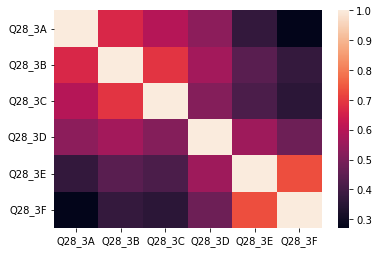

In [170]:
sns.heatmap(df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].corr())

In [171]:
df_clean.groupby('AGE4')['uses_pt'].value_counts()

AGE4   uses_pt
18-29  0          221
       1           79
30-44  0          240
       1           53
45-59  0          189
       1           33
60+    0          217
       1           27
Name: uses_pt, dtype: int64

In [172]:
df_clean[(df_clean['AGE4']!='60+') & (df_clean['uses_pt']==1)][['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].describe()

,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,3.969697,4.084848,4.030303,4.169697,3.787879,3.484848
std,0.984169,1.014565,0.829518,0.887750,0.922535,1.140208
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# T test between elderly and other ages, checked for variance because thats an assumption that needs to be specified

In [173]:
from scipy.stats import ttest_ind
import statistics

In [174]:
seniors = df_clean[df_clean['AGE4']=='60+']
other_age = df_clean[df_clean['AGE4']!='60+']

In [175]:
print(statistics.variance(seniors['Q28_3A']) == statistics.variance(other_age['Q28_3A']))

False


In [176]:
ttest_ind(seniors['Q28_3A'], other_age['Q28_3A'], equal_var = False)

Ttest_indResult(statistic=-0.18824346763883085, pvalue=0.8507794007308157)

In [177]:
print(statistics.variance(seniors['Q28_3B']) == statistics.variance(other_age['Q28_3B']))

False


In [178]:
ttest_ind(seniors['Q28_3B'], other_age['Q28_3B'], equal_var = False)

Ttest_indResult(statistic=-0.827890568648096, pvalue=0.4082253486718115)

In [179]:
print(statistics.variance(seniors['Q28_3C']) == statistics.variance(other_age['Q28_3C']))

False


In [180]:
ttest_ind(seniors['Q28_3C'], other_age['Q28_3C'], equal_var = False)

Ttest_indResult(statistic=0.48046833419262186, pvalue=0.6311614279247477)

In [181]:
print(statistics.variance(seniors['Q28_3D']) == statistics.variance(other_age['Q28_3D']))

False


In [182]:
ttest_ind(seniors['Q28_3D'], other_age['Q28_3D'], equal_var = False)

Ttest_indResult(statistic=-1.3311202432263092, pvalue=0.18394036241787623)

In [183]:
print(statistics.variance(seniors['Q28_3E']) == statistics.variance(other_age['Q28_3E']))

False


In [184]:
ttest_ind(seniors['Q28_3E'],other_age['Q28_3E'], equal_var = False)

Ttest_indResult(statistic=0.5910986128621435, pvalue=0.554804226599195)

In [185]:
print(statistics.variance(seniors['Q28_3F']) == statistics.variance(other_age['Q28_3F']))

False


In [186]:
ttest_ind(seniors['Q28_3F'], other_age['Q28_3F'], equal_var = False)

Ttest_indResult(statistic=1.8013804768709376, pvalue=0.0723933582769453)

In [187]:
#none of them are different lol, so we say that there is no difference between the elderly and regular people, so we can use
#perceptions of everyone and its the same difference

## a box plot

C:\Users\potte\tools\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


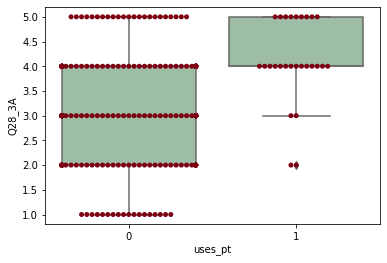

In [189]:
ax = sns.boxplot(x='uses_pt', y='Q28_3A', data=df_clean[df_clean['AGE4']=='60+'], color='#99c2a2')
ax = sns.swarmplot(x="uses_pt", y="Q28_3A", data=df_clean[df_clean['AGE4']=='60+'], color='#7d0013')
plt.show()

In [190]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['1'], df['0'],)
print(fvalue, pvalue)

NameError: name 'df' is not defined

### -----------------------------------------------------------------------------------------------------------------------

# Visualizations-these have changed a bit because they are being done on cleaned data, not sure if we want to do a before and after cleaning

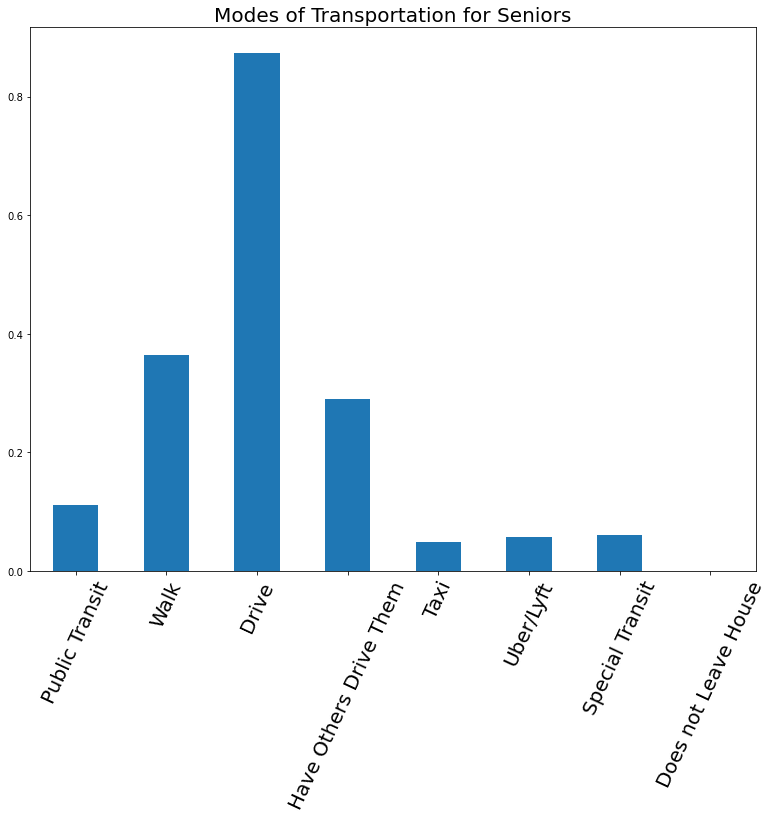

In [193]:
# Create bins for each transportation mode used by seniors and track normalized value counts
pub_trans = seniors['Q24G'].value_counts(sort=False,normalize=True)
walk = seniors['Q24A'].value_counts(sort=False,normalize=True)
drive = seniors['Q24B'].value_counts(sort=False,normalize=True)
others_drive = seniors['Q24C'].value_counts(sort=False,normalize=True)
taxi = seniors['Q24D'].value_counts(sort=False,normalize=True)
uber = seniors['Q24E'].value_counts(sort=False,normalize=True)
special_trans = seniors['Q24F'].value_counts(sort=False,normalize=True)
no_leave = seniors['Q24J'].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
transit_modes = pd.DataFrame([pub_trans,walk,drive,others_drive,taxi,uber,special_trans,no_leave])

#Make the graph
plt.figure(figsize=(20,100))
ax = transit_modes[1].plot.bar(stacked=False,figsize=(13,10),rot=0)

plt.title('Modes of Transportation for Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.set_xticklabels( ('Public Transit', 'Walk','Drive','Have Others Drive Them','Taxi','Uber/Lyft','Special Transit','Does not Leave House') )
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

<Figure size 1440x7200 with 0 Axes>

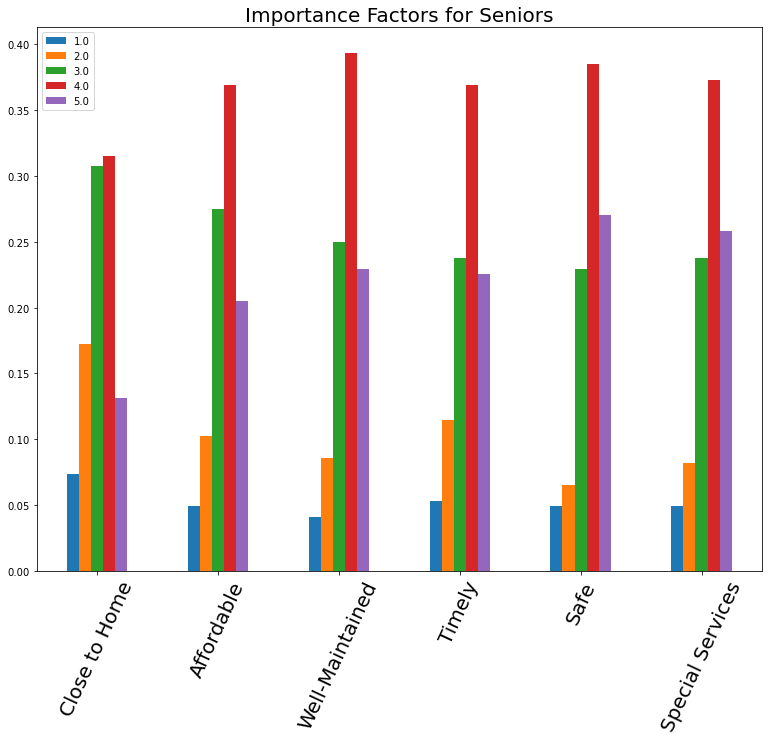

In [194]:
# Create bins for each importance factor to seniors and track normalized value counts
close = seniors['Q28_3A'].value_counts(sort=True,normalize=True)
affordable = seniors['Q28_3B'].value_counts(sort=False,normalize=True)
maintained = seniors['Q28_3C'].value_counts(sort=False,normalize=True)
timely = seniors['Q28_3D'].value_counts(sort=False,normalize=True)
safe = seniors['Q28_3E'].value_counts(sort=False,normalize=True)
special_services = seniors['Q28_3F'].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
importance_factors = pd.DataFrame([close,affordable,maintained,timely,safe,special_services])

#Make the graph
plt.figure(figsize=(20,100))
ax = importance_factors.plot.bar(stacked=False,figsize=(13,10),rot=0)

plt.title('Importance Factors for Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.set_xticklabels( ('Close to Home','Affordable','Well-Maintained','Timely','Safe','Special Services') )
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

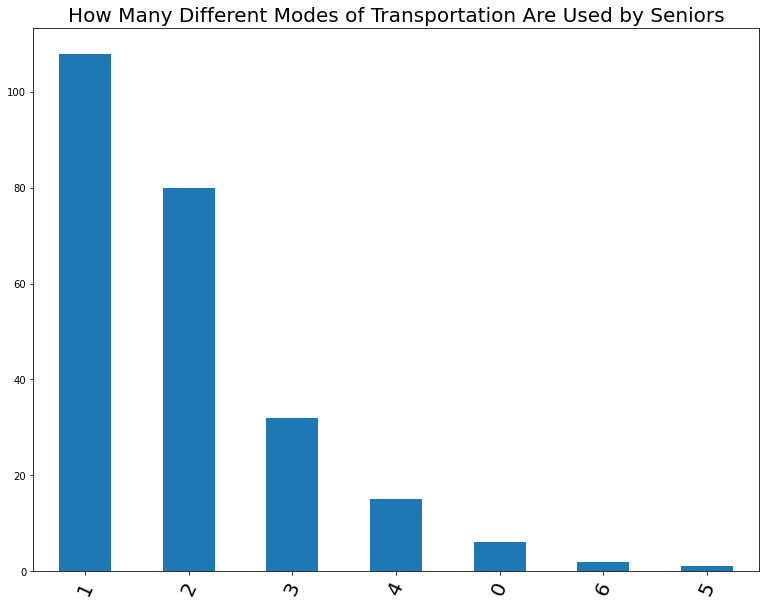

In [195]:
# how many types of transportation modes do seniors use-kaylee

# I want to use groupby feature to see the breakdown of each mode, but that still needs to come because that info
# isn't in the seniors database yet, and I also need to make sure its in order with that random 0
plt.figure(figsize=(20,100))
ax = seniors['number_of_modes'].value_counts(sort=True).plot.bar(stacked=False,figsize=(13,10),rot=0)
plt.title('How Many Different Modes of Transportation Are Used by Seniors', fontsize=20)
plt.ylabel('',fontsize=14)
ax.tick_params(axis='x', labelsize=20,rotation=65)
plt.show()

<AxesSubplot:xlabel='Q28_3E', ylabel='uses_pt'>

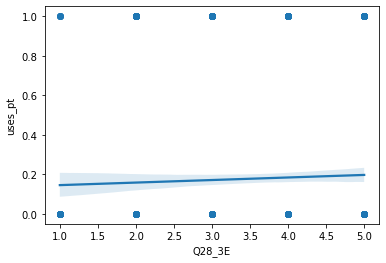

In [196]:
sns.regplot(data=df_clean,x='Q28_3E',y='uses_pt')

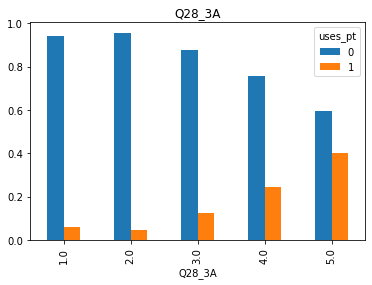

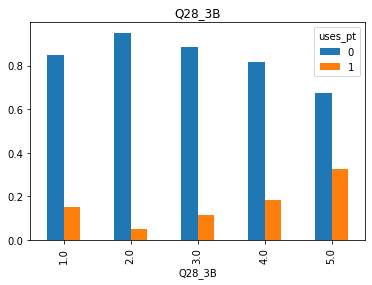

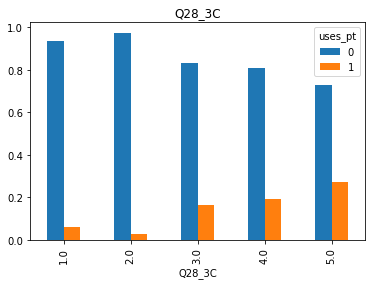

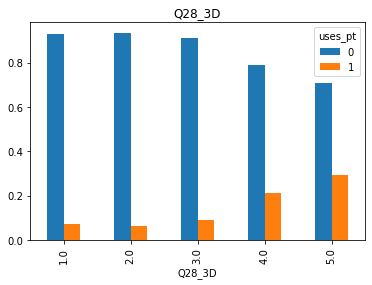

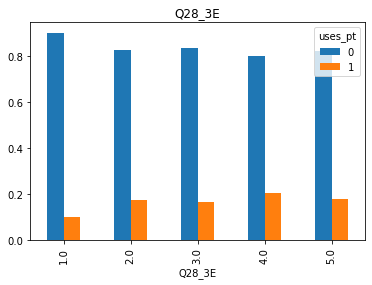

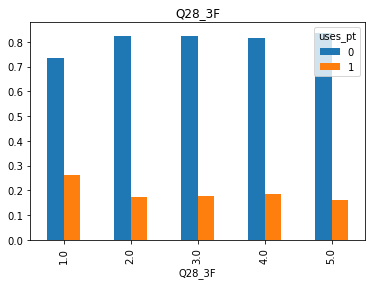

In [197]:
for i in df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']].columns:
    pd.crosstab(df_clean[i],df_clean['uses_pt'],normalize='index').plot(kind='bar')
    plt.title(i)
    plt.show()

In [204]:
df_clean.loc[(df_clean['Salary_in_1000']>=100) & (df_clean['Age']< 60)]

KeyError: 'Salary_in_1000'

In [198]:
# Create bins for each importance factor to seniors and track normalized value counts
close = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3A']].value_counts(sort=False,normalize=True)
affordable = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3B']].value_counts(sort=False,normalize=True)
maintained = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3C']].value_counts(sort=False,normalize=True)
timely = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3D']].value_counts(sort=False,normalize=True)
safe = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3E']].value_counts(sort=False,normalize=True)
special_services = df_clean.loc[(df_clean['uses_pt']==1) & (df_clean['AGE4']=='60+')['Q28_3F']].value_counts(sort=False,normalize=True)

#Create a new dataframe with all the types of transit modes to visualize
importance_factors = pd.DataFrame([close,affordable,maintained,timely,safe,special_services])

chart_frame = importance_factors.transpose()

#Make the graph
plt.figure(figsize=(20,100))
ax = chart_frame.plot.line(figsize=(13,10),rot=0)

plt.title('Importance Factors for Seniors who use Public Transportation', fontsize=20)
plt.ylabel('Percentage of Respondents',fontsize=14)
ax.set_xticklabels(('Not at all Important','Not very important','Somewhat important','Very Important','Extremely Important'))
ax.tick_params(axis='x', labelsize=20,rotation=65)
ax.set_xticks([1,2,3,4,5])
plt.show()

KeyError: 'Q28_3A'

In [205]:
df_clean.to_csv('Data/clean_df.csv')